In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import scipy.sparse

In [3]:
Count = scipy.sparse.load_npz('../data/mat_count_train.npz')
alpha=10
beta=20

In [4]:
count_log = 23.783 * np.log(1 + 5.122996 * Count.data)
count_linear = 6.6041 * Count.data

In [5]:
count_log.mean()

78.16881

In [6]:
count_linear.mean()

40.91097

In [7]:
# Tools used in the plots
def replace_in_brackets(text, factor):
    pos_first_bracket = text.find('{')
    pos_last_bracket = text.find('}')
    return text[:(pos_first_bracket+1)] + str(int(factor * int(text[(pos_first_bracket + 1):pos_last_bracket]))) + text[pos_last_bracket:]

give_color = lambda var: 'r' if var ==  'log' else 'c'
give_color_bias = lambda var: 'c' if var  > 0.0 else 'r'

In [8]:
res = pd.read_csv("results_mlflow/MF.csv")
res2 = pd.read_csv("results_mlflow/MF2.csv")

res = res.append(res2)

rel_vars = [ '.alpha', '.beta', '.bias', '.dim', '.gamma',  '.pre_process', '.weighted',  'mse_test', 'mse_train', 'recallAT10_of_1000', 'recallAT20_of_1000',
       'recallAT4_of_1000', 'recallAT50_of_1000', 'training_time']

new_names  = [ 'alpha', 'beta', 'bias', 'dim', 'gamma',  'pre_process', 'weighted',  'mse_test', 'mse_train', 'recallAT10_of_1000', 'recallAT20_of_1000',
       'recallAT4_of_1000', 'recallAT50_of_1000', 'training_time']

re_order = [ 'bias', 'weighted', 'pre_process', 'dim', 'alpha', 'beta',   'gamma',   'recallAT4_of_1000',   'recallAT10_of_1000', 'recallAT20_of_1000', 'recallAT50_of_1000', 'mse_test', 'mse_train', 'training_time']

res = res.loc[:, rel_vars]

res.columns = new_names

res =res.loc[:, re_order]

res = res.sort_values(by='recallAT4_of_1000', ascending=False)

/home/titoeb/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [9]:
# Only select the non-weighted runs
res = res.loc[res.weighted=='weighted', :]

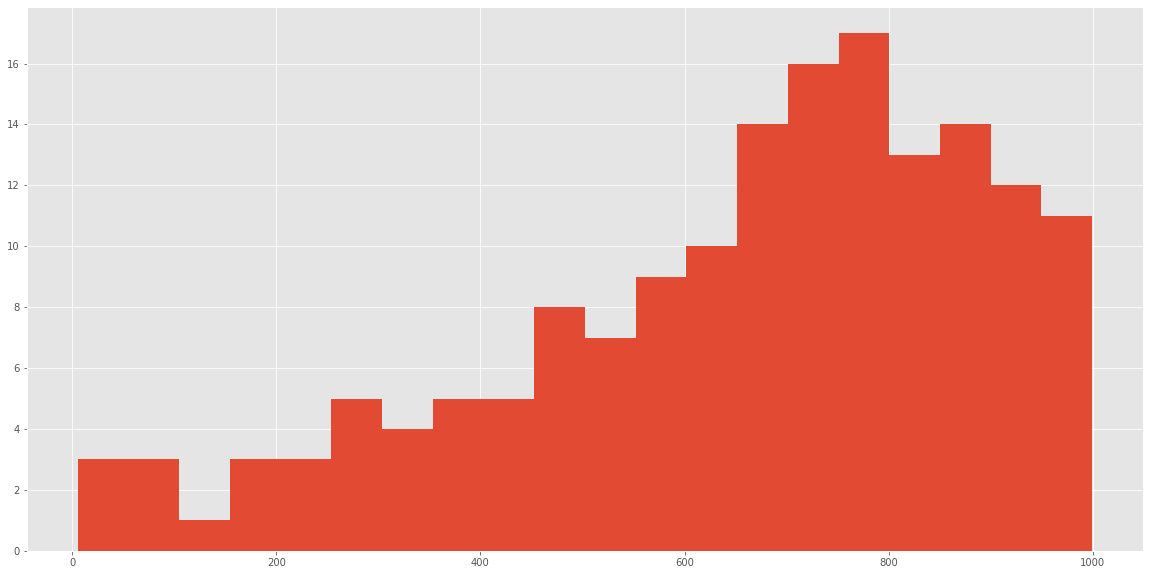

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
hist = ax.hist(res.gamma, bins=20)

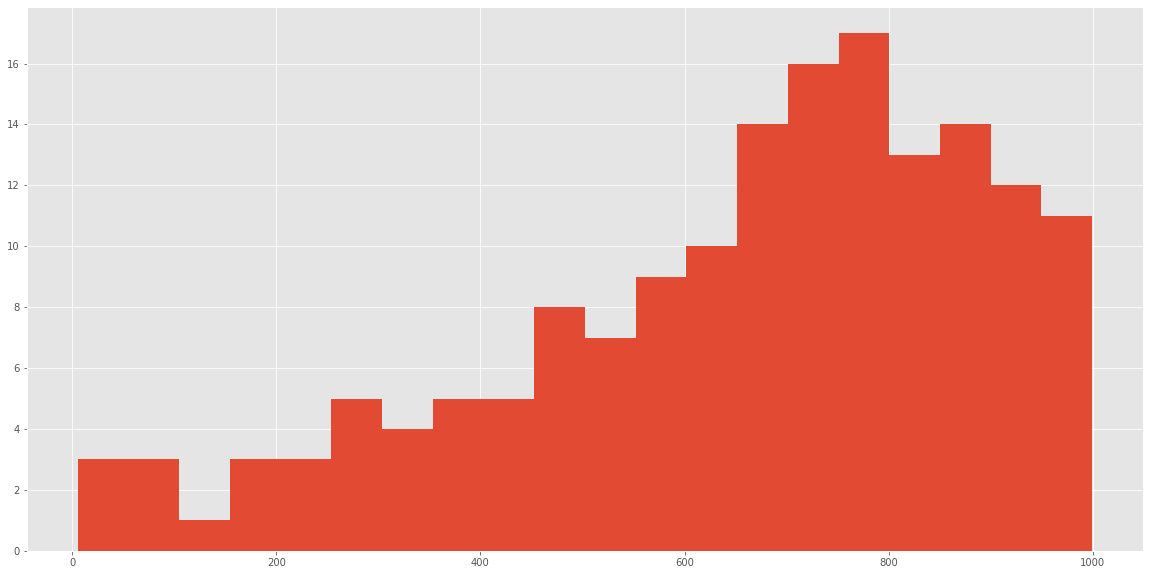

In [11]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(20, 10))
hist1 = ax1.hist(res.gamma, bins=20)

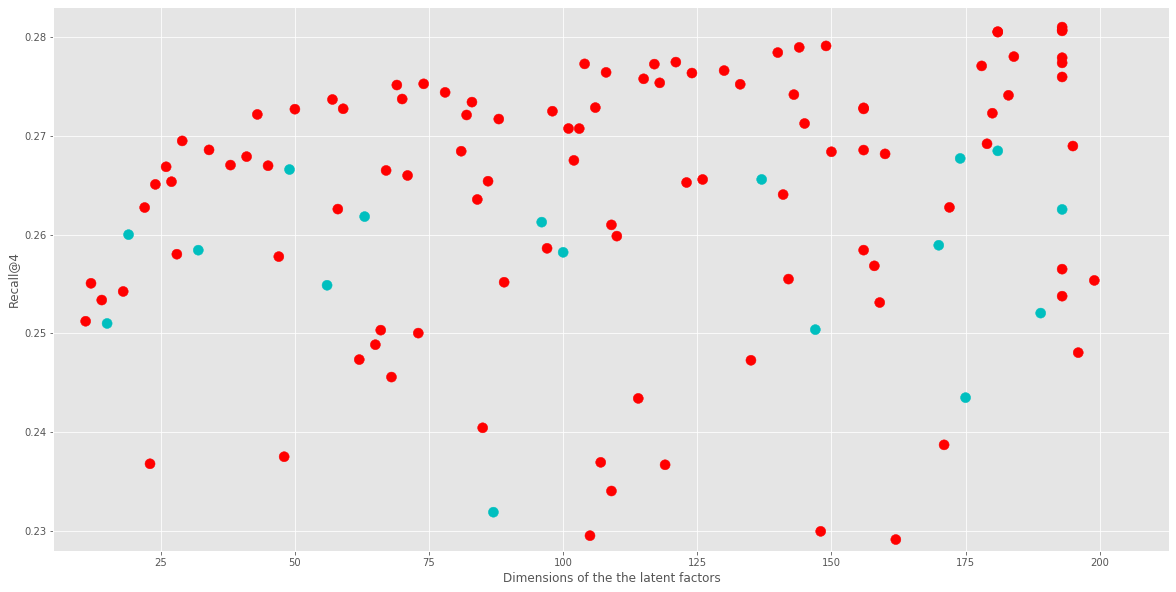

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=res.dim, y=res.recallAT4_of_1000, s=100, color=list(map(give_color_bias, res.bias)))

# produce a legend with a cross section of sizes from the scatter
ax.set_xlabel("Dimensions of the the latent factors")
_ = ax.set_ylabel("Recall@4")
ax.set_xlim(5, 213)
ax.set_ylim(0.228, 0.283)

fig.savefig('figures/MF_bias.png')

In [35]:
n_users, n_items = Count.shape
latent_factors = 200
print(f"using {latent_factors} latent factors, there are {latent_factors * (n_items + n_users)} paramters")

using 200 latent factors, there are 29636600 paramters


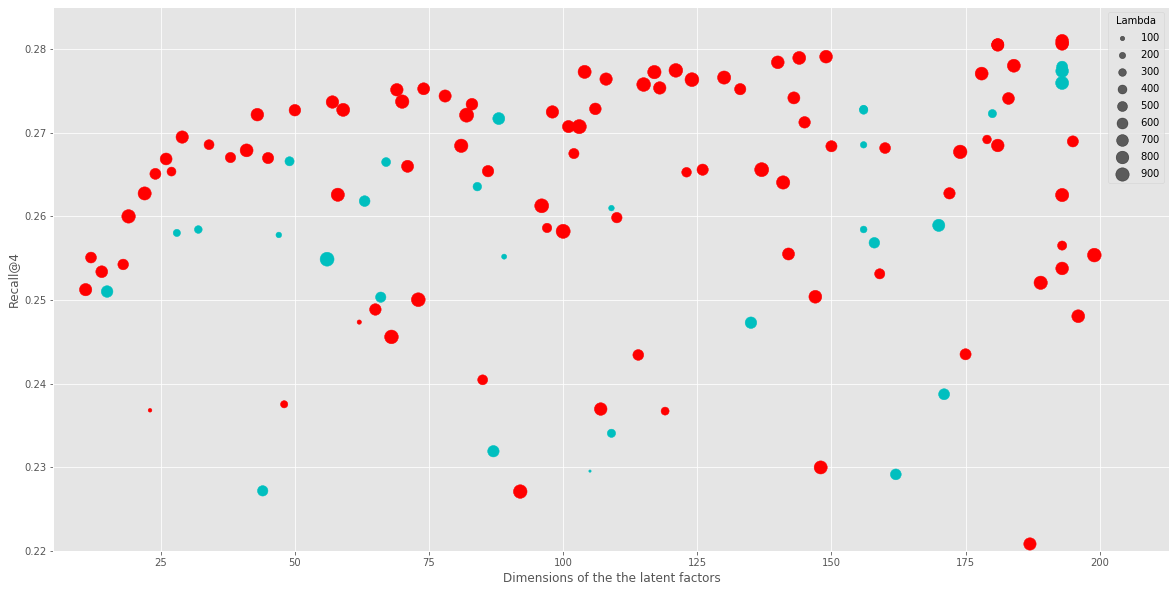

In [21]:
factor_times_size = .2

fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=res.dim, y=res.recallAT4_of_1000, s=res.gamma * factor_times_size, color=list(map(give_color, res.pre_process)))

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
labels = [replace_in_brackets(i, 1 / factor_times_size) for i in labels]
legend = ax.legend(handles, labels, loc="upper right", title="Lambda")
ax.set_xlabel("Dimensions of the the latent factors")
_ = ax.set_ylabel("Recall@4")
ax.set_xlim(5, 213)
ax.set_ylim(0.22, 0.285)

fig.savefig('figures/MF_dim_vs_gamma.png')

In [ ]:
factor_times_size = .2

fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=res.dim, y=res.recallAT4_of_1000, s=res.gamma * factor_times_size, color=list(map(give_color, res.pre_process)))

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
labels = [replace_in_brackets(i, 1 / factor_times_size) for i in labels]
legend = ax.legend(handles, labels, loc="upper right", title="Lambda")
ax.set_xlabel("Dimensions of the the latent factors")
_ = ax.set_ylabel("Recall@4")
ax.set_xlim(5, 213)
ax.set_ylim(0.22, 0.285)

fig.savefig('figures/MF_dim_vs_gamma.png')

In [60]:
high_perf.loc[high_perf.pre_process == 'linear', 'gamma'].mean()

470.2151573173265

In [61]:
high_perf.loc[high_perf.pre_process == 'log', 'gamma'].mean()

760.1723329077662

In [53]:
high_perf.loc[high_perf.pre_process == 'linear', 'alpha'].mean()

6.6041696080837085

In [54]:
high_perf.loc[high_perf.pre_process == 'log', 'alpha'].mean()

23.78336902696413

In [56]:
high_perf.loc[high_perf.pre_process == 'log', 'beta'].mean()

5.122996767529569

In [6]:
high_perf = res.loc[res.recallAT4_of_1000 > 0.26]
high_perf.sort_values(by='gamma')

,bias,weighted,pre_process,dim,alpha,beta,gamma,recallAT4_of_1000,recallAT10_of_1000,recallAT20_of_1000,recallAT50_of_1000,mse_test,mse_train,training_time
75,0.0,weighted,linear,109,1.147847,1.319235,158.510883,0.260976,0.408338,0.529007,0.688144,0.729188,75.959530,95
47,0.0,weighted,linear,156,1.496693,1.573422,211.057192,0.268544,0.416962,0.538465,0.697893,0.703620,75.771900,132
31,0.0,weighted,linear,156,2.361549,4.351618,297.233770,0.272817,0.422252,0.545731,0.705840,0.647500,75.269424,161
36,0.0,weighted,linear,180,4.171324,5.216416,340.432890,0.272274,0.429869,0.556610,0.716749,0.578328,74.004030,190
33,0.0,weighted,linear,156,2.647728,2.131475,361.345706,0.272708,0.418720,0.540762,0.702140,0.634265,75.387080,160
68,0.0,weighted,linear,84,2.056093,1.984303,368.898386,0.263546,0.401769,0.520941,0.683190,0.670579,76.121930,89
44,0.0,weighted,log,179,20.641784,0.886631,377.775351,0.269180,0.431033,0.561766,0.724329,0.520649,73.333336,225
59,0.0,weighted,linear,67,2.784272,3.239172,401.551726,0.266483,0.409206,0.529647,0.692270,0.626809,75.557860,67
64,0.0,weighted,log,27,17.323488,4.976124,402.246329,0.265346,0.418200,0.547175,0.714134,0.404142,73.290730,60
58,1.0,weighted,linear,49,6.266822,8.969634,417.705418,0.266576,0.421347,0.550097,0.718246,0.476975,73.555380,96


In [29]:
res.columns

Index(['bias', 'weighted', 'pre_process', 'dim', 'alpha', 'beta', 'gamma',
       'recallAT4_of_1000', 'recallAT10_of_1000', 'recallAT20_of_1000',
       'recallAT50_of_1000', 'mse_test', 'mse_train', 'training_time'],
      dtype='object')

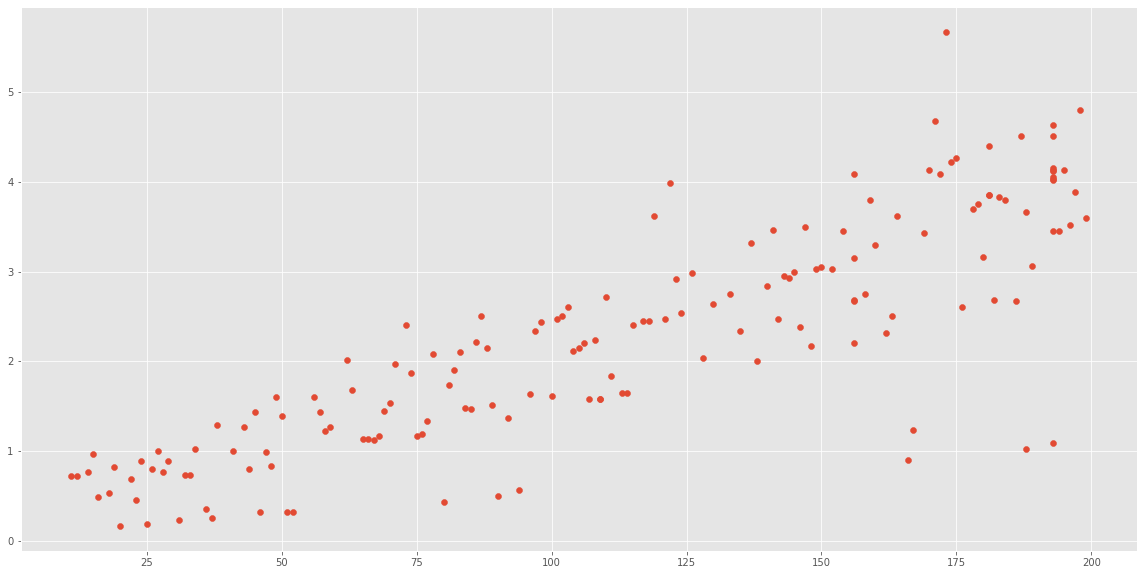

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.dim, y=res.training_time / 60)

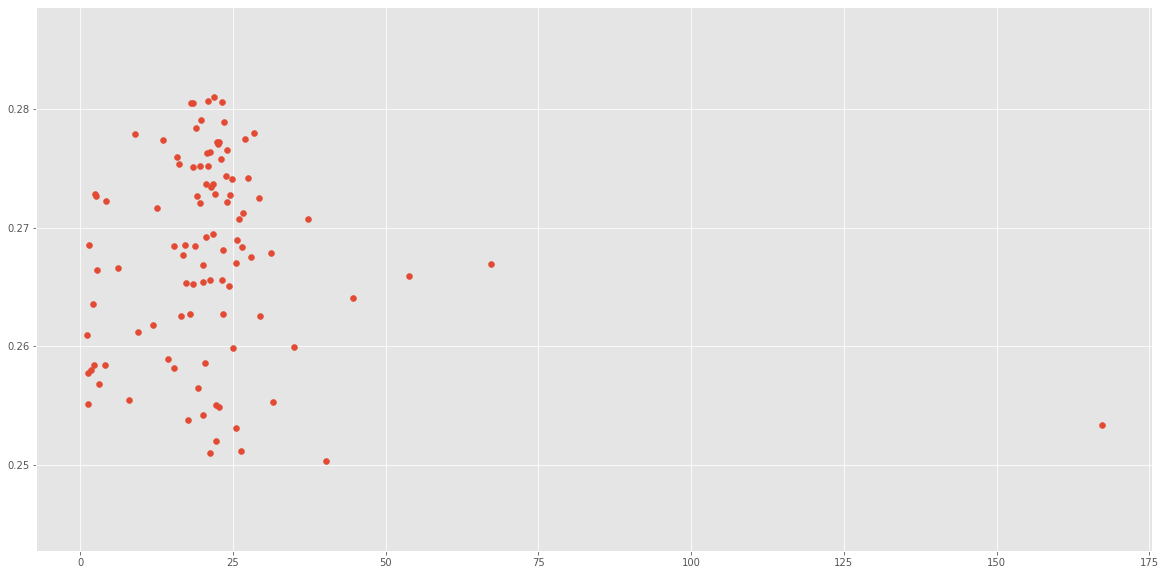

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=res.alpha, y=res.recallAT4_of_1000)

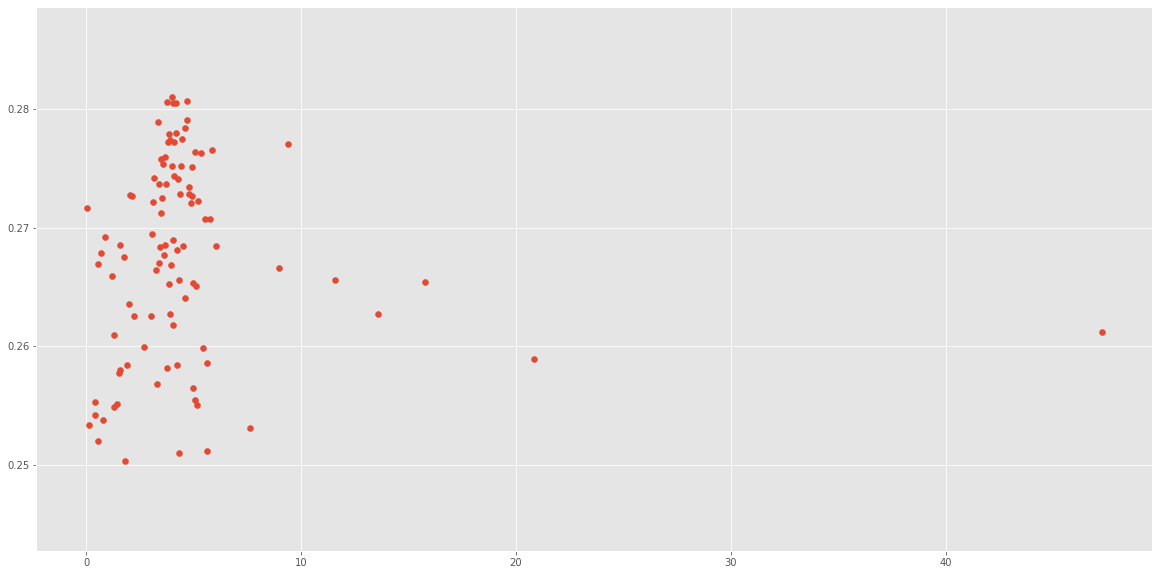

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
scatter = ax.scatter(x=res.beta, y=res.recallAT4_of_1000)

In [ ]:
fig.savefig

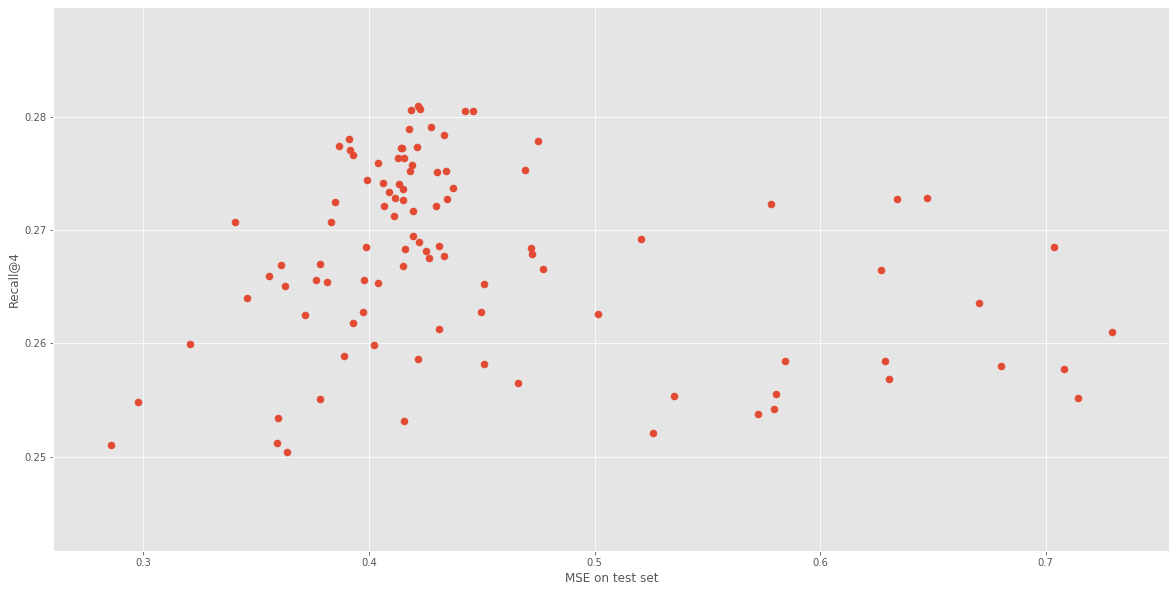

In [38]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x=res.mse_test, y=res.recallAT4_of_1000, s=50)
ax.set_ylabel('Recall@4')
ax.set_xlabel('MSE on test set')
fig.savefig('figures/MF_rankingvsprecision.png')

In [40]:
res.loc[res.bias == 0, :].iloc[0, :]

bias                         0
weighted              weighted
pre_process                log
dim                        193
alpha                  21.9516
beta                   4.01418
gamma                  809.923
recallAT4_of_1000     0.280988
recallAT10_of_1000    0.437516
recallAT20_of_1000    0.567097
recallAT50_of_1000    0.728586
mse_test              0.421743
mse_train              73.2429
training_time              248
Name: 0, dtype: object

In [42]:
res.loc[res.weighted != 'weighted', :]

,bias,weighted,pre_process,dim,alpha,beta,gamma,recallAT4_of_1000,recallAT10_of_1000,recallAT20_of_1000,recallAT50_of_1000,mse_test,mse_train,training_time
